# Cleanse Anomalies in Saildrone Salinity Data

#### Configure Saildrone Dataset Below

In [4]:
ddir = '~/shared/users/mgarciareyes/saildrone_data/'
fn = input("Enter Dataset Name with file extension (leave blank for default)")
if (not fn):
    print("No Entry Provided: Selected Default")
    fn = 'saildrone_west_coast_survey_2019_sd1044_JPLv5.0_8dy_20210613norep_20210613_20211116.nc'
fn

Enter Dataset Name with file extension (leave blank for default) 


No Entry Provided: Selected Default


'saildrone_west_coast_survey_2019_sd1044_JPLv5.0_8dy_20210613norep_20210613_20211116.nc'

In [5]:
#import necessary packages
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns
import datetime
import warnings
warnings.simplefilter('ignore') 

#load map packages
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from calendar import month_abbr

In [6]:
#open .nc file with Saildrone Data
sail = xr.open_dataset(ddir + fn) 
sail.close()

#copy data for calculations versus graphing
sail_raw = sail.copy()

sail

<xarray.Dataset>
Dimensions:                       (time: 145)
Coordinates:
    trajectory                    float32 ...
  * time                          (time) datetime64[ns] 2019-07-22T01:16:30 ....
    ob                            (time) int64 ...
Data variables: (12/41)
    lat                           (time) float64 ...
    lon                           (time) float64 ...
    SOG_MEAN                      (time) float64 ...
    COG_MEAN                      (time) float64 ...
    HDG_MEAN                      (time) float64 ...
    ROLL_MEAN                     (time) float64 ...
    ...                            ...
    sat_lon                       (time) float64 ...
    dist_land                     (time) float64 ...
    analysed_sst                  (time) float64 ...
    analysis_error                (time) float64 ...
    mask                          (time) float64 ...
    sea_ice_fraction              (time) float64 ...
Attributes: (12/45)
    area:                      Pacific Ocean
    cdm_data_type:             Trajectory
    cdm_trajectory_variables:  trajectory
    Conventions:               CF-1.6, ACDD-1.3, COARDS
    creator_email:             support@saildrone.com
    creator_name:              Saildrone
    ...                        ...
    time_coverage_end:         2019-09-16T19:57:00Z
    time_coverage_resolution:  PT1M
    time_coverage_start:       2019-06-18T00:00:00Z
    title:                     Saildrone West Coast Survey 2019
    Westernmost_Easting:       -125.970752
    vehicle_id:                sd1044

#### Filter Out Nonreal Data (+9999)

In [9]:
def filterSAL(min, max):
    sail['SAL_CTD_MEAN']=sail.SAL_CTD_MEAN.where(sail.SAL_CTD_MEAN>min, np.nan)
    sail['SAL_CTD_MEAN']=sail.SAL_CTD_MEAN.where(sail.SAL_CTD_MEAN<max, np.nan)
    return True

In [10]:
font = {
    'family': 'monospace',
    'color':  'k',
    'weight': 'normal',
    'size': 16,
}

def drawSAL():    
    #create plot 
    plt.figure(figsize=(16, 4))
    plt.scatter(x = sail['time'].dt.date, y = sail['SAL_CTD_MEAN']) #seaborn has built in confidence intervals
    # make temp/sal plot
    #add labels

    plt.grid(zorder=0, alpha=0.5)
    plt.xlabel('TIME (WEEKLY)', fontdict = font)
    plt.ylabel('SEA SURFACE\nSALINITY (PPU)', fontdict = font)
    plt.show()

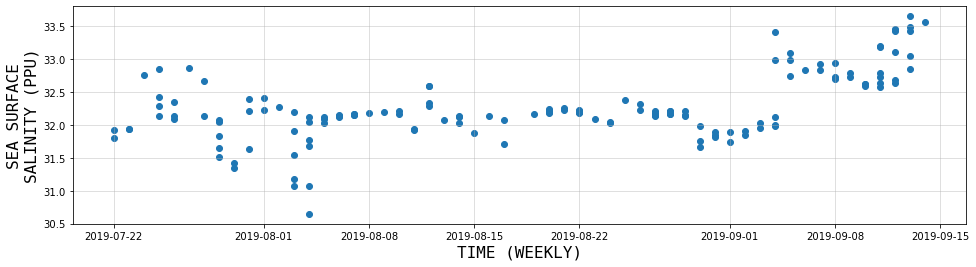

In [11]:
# Remove Any Error Data
filterSAL(0, 9999)
drawSAL()

#### Set Threshold Parameters (Leave Blank if None)
##### You can swap the **min** and **max** values to print outliers only

Filtered between 30 and 35 PPU


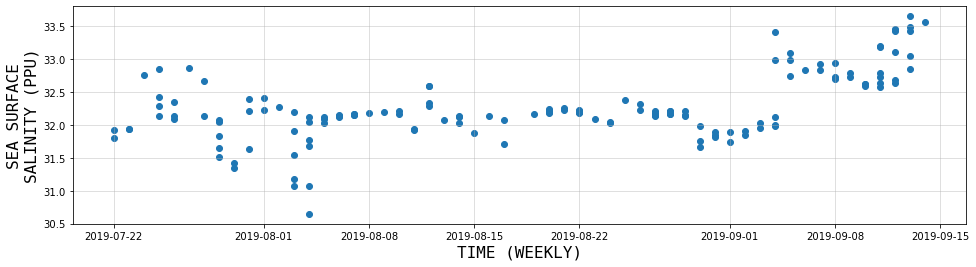

In [12]:
min_thresh = 30
max_thresh = 35

if (min_thresh & max_thresh):
    print("Filtered between " + str(min_thresh) + " and " + str(max_thresh) + " PPU")
    filterSAL(min_thresh, max_thresh)
drawSAL()

#### Report Final (Cleaned) Dataset

In [13]:
sail

<xarray.Dataset>
Dimensions:                       (time: 145)
Coordinates:
    trajectory                    float32 1.044e+03
  * time                          (time) datetime64[ns] 2019-07-22T01:16:30 ....
    ob                            (time) int64 0 1 2 3 4 ... 140 141 142 143 144
Data variables: (12/41)
    lat                           (time) float64 43.81 43.73 ... 37.85 37.78
    lon                           (time) float64 -125.2 -125.1 ... -123.1 -122.9
    SOG_MEAN                      (time) float64 1.507 0.748 ... 1.051 1.237
    COG_MEAN                      (time) float64 172.1 175.5 ... 112.4 147.9
    HDG_MEAN                      (time) float64 171.3 195.3 ... 104.6 149.9
    ROLL_MEAN                     (time) float64 -0.1809 -0.3311 ... -1.067
    ...                            ...
    sat_lon                       (time) float64 -125.2 -125.1 ... -123.1 -122.9
    dist_land                     (time) float64 79.27 72.24 ... 23.09 11.74
    analysed_sst                  (time) float64 290.5 290.5 ... 287.4 287.6
    analysis_error                (time) float64 0.3732 0.37 0.38 ... 0.4 0.4
    mask                          (time) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    sea_ice_fraction              (time) float64 nan nan nan nan ... nan nan nan
Attributes: (12/45)
    area:                      Pacific Ocean
    cdm_data_type:             Trajectory
    cdm_trajectory_variables:  trajectory
    Conventions:               CF-1.6, ACDD-1.3, COARDS
    creator_email:             support@saildrone.com
    creator_name:              Saildrone
    ...                        ...
    time_coverage_end:         2019-09-16T19:57:00Z
    time_coverage_resolution:  PT1M
    time_coverage_start:       2019-06-18T00:00:00Z
    title:                     Saildrone West Coast Survey 2019
    Westernmost_Easting:       -125.970752
    vehicle_id:                sd1044

# Optional: Compare data to Satellite
### We will plot the satellite data behind the saildrone points, colored by SSS (PPU)

In [14]:
#file location of the sat data (there is also sat data in the saildrone? ask Gammon)
file_location = 'RSS_smap_SSS_L3_8day_running_2018_006_FNL_v04.0.nc4'

satSSS = xr.open_dataset(file_location)

satSSS

<xarray.Dataset>
Dimensions:               (lat: 720, lon: 1440, time: 1)
Coordinates:
  * lat                   (lat) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * lon                   (lon) float32 0.125 0.375 0.625 ... 359.4 359.6 359.9
  * time                  (time) datetime64[ns] 2018-01-06T12:00:00
Data variables:
    sss_smap              (lat, lon) float32 ...
    nobs_40km             (lat, lon) float64 ...
    gice                  (lat, lon) float32 ...
    surtep                (lat, lon) float32 ...
    gland                 (lat, lon) float32 ...
    nobs                  (lat, lon) float64 ...
    sss_smap_40km         (lat, lon) float32 ...
    sss_ref               (lat, lon) float32 ...
    fland                 (lat, lon) float32 ...
    sss_smap_uncertainty  (lat, lon) float32 ...
Attributes: (12/59)
    Conventions:                                    CF-1.6, ACDD-1.3
    standard_name_vocabulary:                       CF Standard Name Table v27
    title:                                          SMAP ocean surface salinity
    version:                                        V4.0 Validated Release
    processing_level:                               L3
    resolution:                                     Spatial resolution: appro...
    ...                                             ...
    Source_of_SMAP_SSS:                             Meissner, T., F. Wentz, A...
    Source_of__ancillary_reference_SSS_from_HYCOM:  Hybrid Coordinate Ocean M...
    Source_of_ancillary_SST:                        Canada Meteorological Cen...
    Source_of_ancillary_AMSR2_sea_ice_mask:         RSS AMSR2 sea-ice mask. W...
    Source_of_ancillary_land_mask:                  1 km land/water mask from...
    history_json:                                   [{"$schema":"https:\/\/ha...

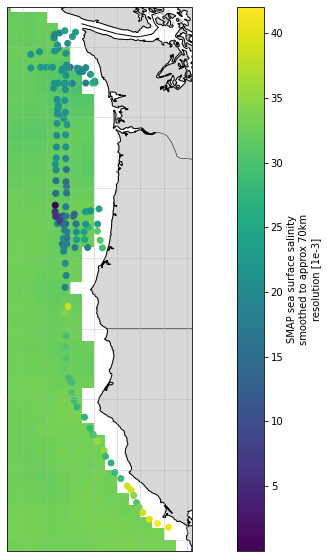

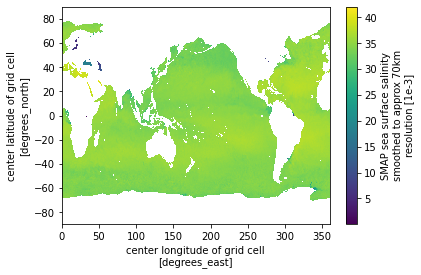

In [15]:
fig = plt.figure(figsize=(16,10), dpi = 72)
ax = plt.axes(projection=ccrs.PlateCarree())

#define latitude and longitude boundaries
latr = [min(sail['lat']), max(sail['lat'])] 
lonr = [max(sail['lon']), min(sail['lon'])] 

# Select a region of our data, giving it a margin
margin = 0.5 
region = np.array([[latr[0]-margin,latr[1]+margin],[lonr[0]+margin,lonr[1]-margin]]) 

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.coastlines(resolution='10m',linewidth=1,color='black')
ax.add_feature(cfeature.LAND, color='grey', alpha=0.3)
ax.add_feature(states_provinces, linewidth = 0.5)
ax.add_feature(cfeature.BORDERS, color = 'black')
ax.set_extent([region[1,0],region[1,1],region[0,0],region[0,1]],crs=ccrs.PlateCarree()) 
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.gridlines(linestyle = '--', linewidth = 0.5)

satSSS['sss_smap'].plot()
#plot saildrone and sat data
plt.scatter(sail.lon, sail.lat, c = sail['SAL_CTD_MEAN'])

plt.show()

satSSS['sss_smap'].plot()